In [1]:
import os
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('../../CHESTXRAY/Data_Entry_2017.csv')
image_dir = '../../images'
image_path = {f:os.path.join(image_dir,f) for f in os.listdir(image_dir)}
print("Scans found: {}, total headers: {}".format(len(image_path), df.shape[0]))
df['path'] = df['Image Index'].map(image_path.get)  # add path column
# note: df['Patient Age'] has value larger than 100
df.sample(3)

Scans found: 112120, total headers: 112120


,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,y],Unnamed: 11,path
74708,00018353_000.png,Infiltration,0,18353,51,M,PA,2992,2991,0.143,0.143,NaN,../../images/00018353_000.png
8743,00002300_051.png,Effusion|Infiltration,51,2300,81,F,AP,2500,2048,0.168,0.168,NaN,../../images/00002300_051.png
45791,00011723_018.png,No Finding,18,11723,66,M,AP,2500,2048,0.168,0.168,NaN,../../images/00011723_018.png


In [3]:
df['positive'] = df['Finding Labels'].map(lambda x: 1 if x != 'No Finding' else 0)
df['negtive'] = df['Finding Labels'].map(lambda x: 1 if x == 'No Finding' else 0)
df.sample(3)

,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,y],Unnamed: 11,path,positive,negtive
20387,00005451_000.png,No Finding,0,5451,38,M,PA,2500,2048,0.171,0.171,NaN,../../images/00005451_000.png,0,1
56810,00014125_040.png,No Finding,40,14125,28,M,AP,3042,2544,0.139,0.139,NaN,../../images/00014125_040.png,0,1
5688,00001534_005.png,Cardiomegaly|Mass,5,1534,66,F,PA,2048,2500,0.168,0.168,NaN,../../images/00001534_005.png,1,0


In [4]:
classes = ['positive', 'negtive']
nb_records, nb_classes = df.shape[0], len(classes)
print(nb_records, nb_classes)

112120 2


In [5]:
train_df = df.iloc[:int(nb_records*0.7)]
valid_df = df.iloc[int(nb_records*0.7):int(nb_records*0.9)]
test_df = df.iloc[int(nb_records*0.9):]
print(train_df.shape, valid_df.shape, test_df.shape)

(78484, 15) (22424, 15) (11212, 15)


In [6]:
from generator import DataGenerator

batch_size = 16

test_generator = DataGenerator(test_df, path_key="path", classes_key=classes, batch_size=batch_size, shuffle=False)
print(len(test_generator))

Using TensorFlow backend.


701


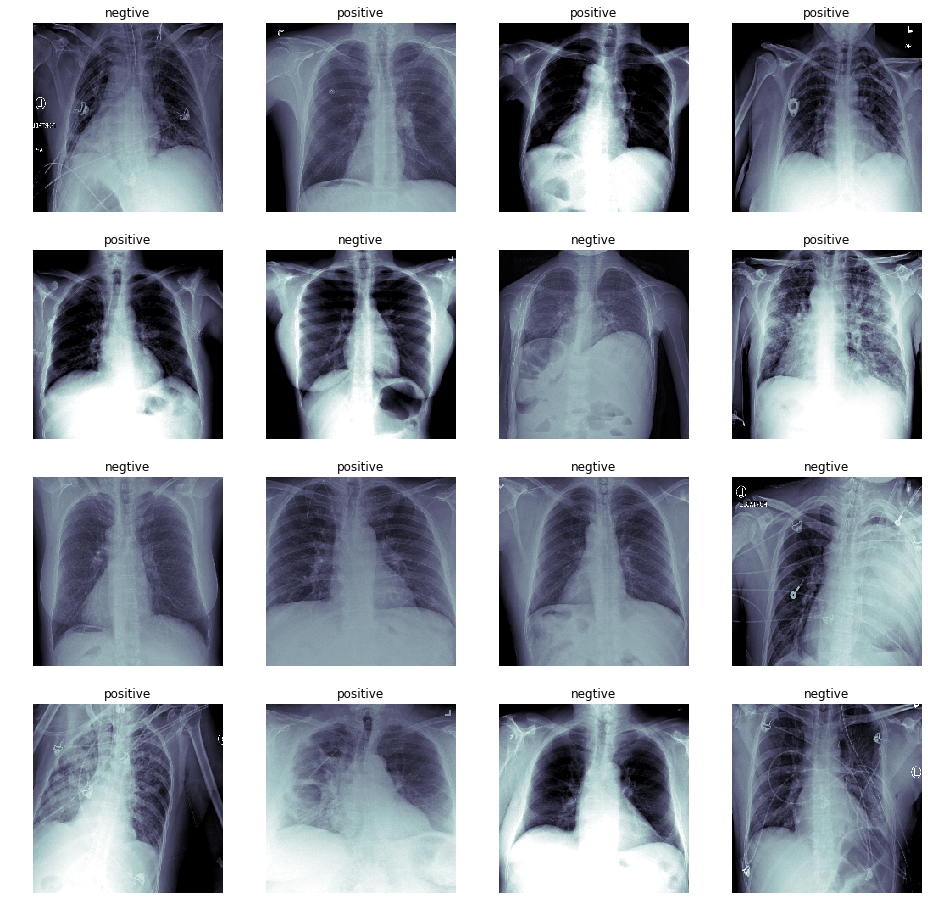

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt

t_x, t_y = test_generator[0]
fig, m_axs = plt.subplots(4, 4, figsize = (16, 16))
for (c_x, c_y, c_ax) in zip(t_x, t_y, m_axs.flatten()):
    c_ax.imshow(c_x[:,:,0], cmap = 'bone', vmin = -1.5, vmax = 1.5)
    c_ax.set_title(classes[np.argmax(c_y)])
    c_ax.axis('off')